In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [ ]:
basket = pd.read_csv("Groceries_dataset.csv")
display(basket.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
basket = basket.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket),
columns=encoder.columns_)
display(transactions.head()) 

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket),use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1.5)
display(rules.head())
print("Rules identified: ", len(rules))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
2,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685
3,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178


Rules identified:  190


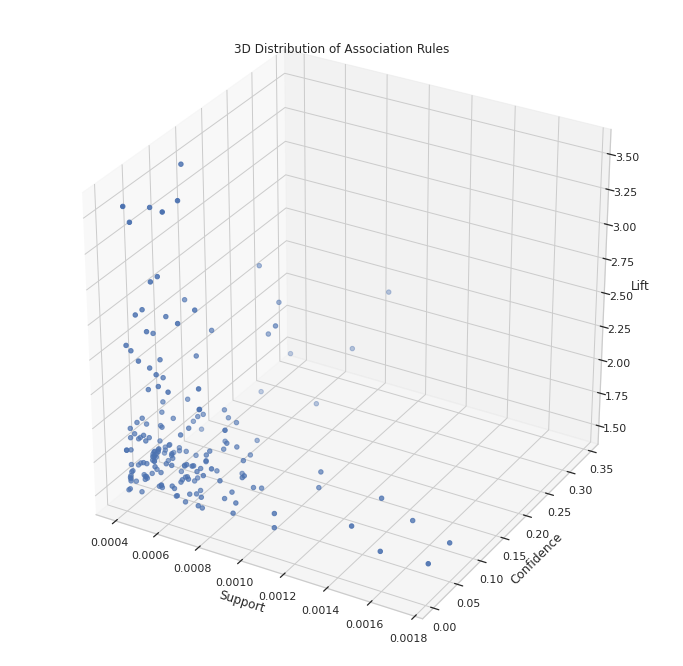

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')
x = rules['support']
y = rules['confidence']
z = rules['lift']
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")
ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")
plt.show()


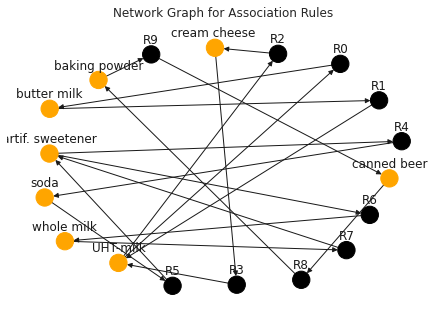

In [ ]:
def draw_network(rules, rules_to_show):
 # Directional Graph from NetworkX
 network = nx.DiGraph()

 # Loop through number of rules to show
 for i in range(rules_to_show):

 # Add a Rule Node
  network.add_nodes_from(["R"+str(i)])
  for antecedents in rules.iloc[i]['antecedents']:
 # Add antecedent node and link to rule
    network.add_nodes_from([antecedents])
    network.add_edge(antecedents, "R"+str(i), weight = 2)

  for consequents in rules.iloc[i]['consequents']:
 # Add consequent node and link to rule
    network.add_nodes_from([consequents])
    network.add_edge("R"+str(i), consequents, weight = 2)
    color_map=[]

 # For every node, if it's a rule, colour as Black, otherwise Orange
 for node in network:
  if re.compile("^[R]\d+$").fullmatch(node) != None:
    color_map.append('black')
  else:
    color_map.append('orange')

 # Position nodes using spring layout
 pos = nx.spring_layout(network, k=16, scale=1)
 # Draw the network graph
 nx.draw(network, pos, node_color = color_map, font_size=8)

 # Shift the text position upwards
 for p in pos:
  pos[p][1] += 0.12
 nx.draw_networkx_labels(network, pos)
 plt.title("Network Graph for Association Rules")
 plt.show()
draw_network(rules, 10)